In [3]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

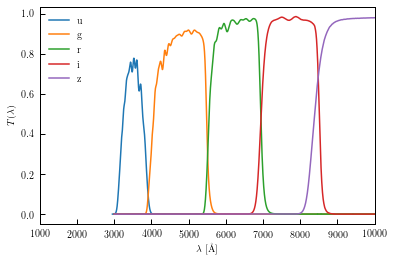

In [15]:
# SDSS standard filter transmission curves
# http://filters.apo.nmsu.edu/curves/SDSS/
sdss_filter_names = ['u','g','r','i','z']

lines = []
for filter_name in sdss_filter_names:
    t = ascii.read(filter_name+'.dat')
    wav = t['col1']
    trans = t['col2']
    l, = plt.plot(wav, trans)
    lines.append(l)
plt.xlim([1000,10000])
plt.legend(lines, sdss_filter_names, frameon=False)
plt.xlabel(r'$\lambda~[\rm \AA]$')
plt.ylabel(r'$T(\lambda)$')
plt.show()

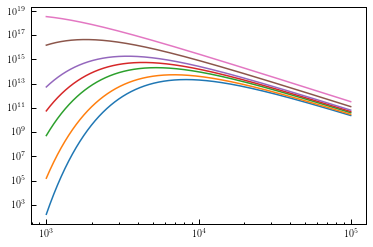

In [9]:
# blackbody intensity function
h = 6.6261*10**(-27)  # cm^2 g / s
c = 2.99792*10**(10)  # cm / s
k = 1.3806*10**(-16)  # erg / K

def planck(wav, T):
    """
    blackbody intensity function
    
    Parameters
    ----------
    wav : array_like
        array of wavelengths in units of cm
    
    T : float
        blackbody temperature in units of kelvin
    """
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/((wav**5)*(np.exp(b)-1.0))
    return intensity

temps = [3500, 4200, 5500, 6700, 8500, 16000, 40000]  # Kelvin
wav = np.arange(1000, 100000, 1)  # Angstroms

fig = plt.figure()
for T in temps:
    wav_in_cm = wav*10**(-8)
    bb = planck(wav_in_cm, T)
    plt.plot(wav, bb)
plt.xscale('log')
plt.yscale('log')
plt.show()